In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Data Sets/train_data.csv'  # Update the path accordingly

# Read the CSV file
data = pd.read_csv(file_path)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      5600 non-null   int64  
 1   income_level                             5600 non-null   int64  
 2   fico_score                               5600 non-null   float64
 3   delinquency_status                       5600 non-null   int64  
 4   number_of_credit_applications            5600 non-null   int64  
 5   debt_to_income_ratio                     5600 non-null   float64
 6   payment_methods_high_risk                5600 non-null   int64  
 7   max_balance                              5600 non-null   float64
 8   avg_balance_last_12months                5600 non-null   float64
 9   number_of_delinquent_accounts            5600 non-null   float64
 10  number_of_defaulted_accounts             5600 no

In [ ]:
data.shape

(5600, 23)

EDA

pie charts

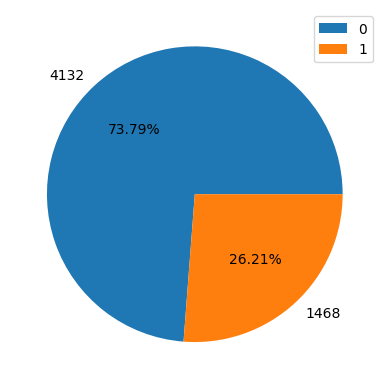

In [ ]:
counts = data["charge_off_status"].value_counts()
plt.pie(counts, autopct="%0.2f%%", labels=counts)
plt.legend(counts.index)
plt.show()

Distribution of all features:



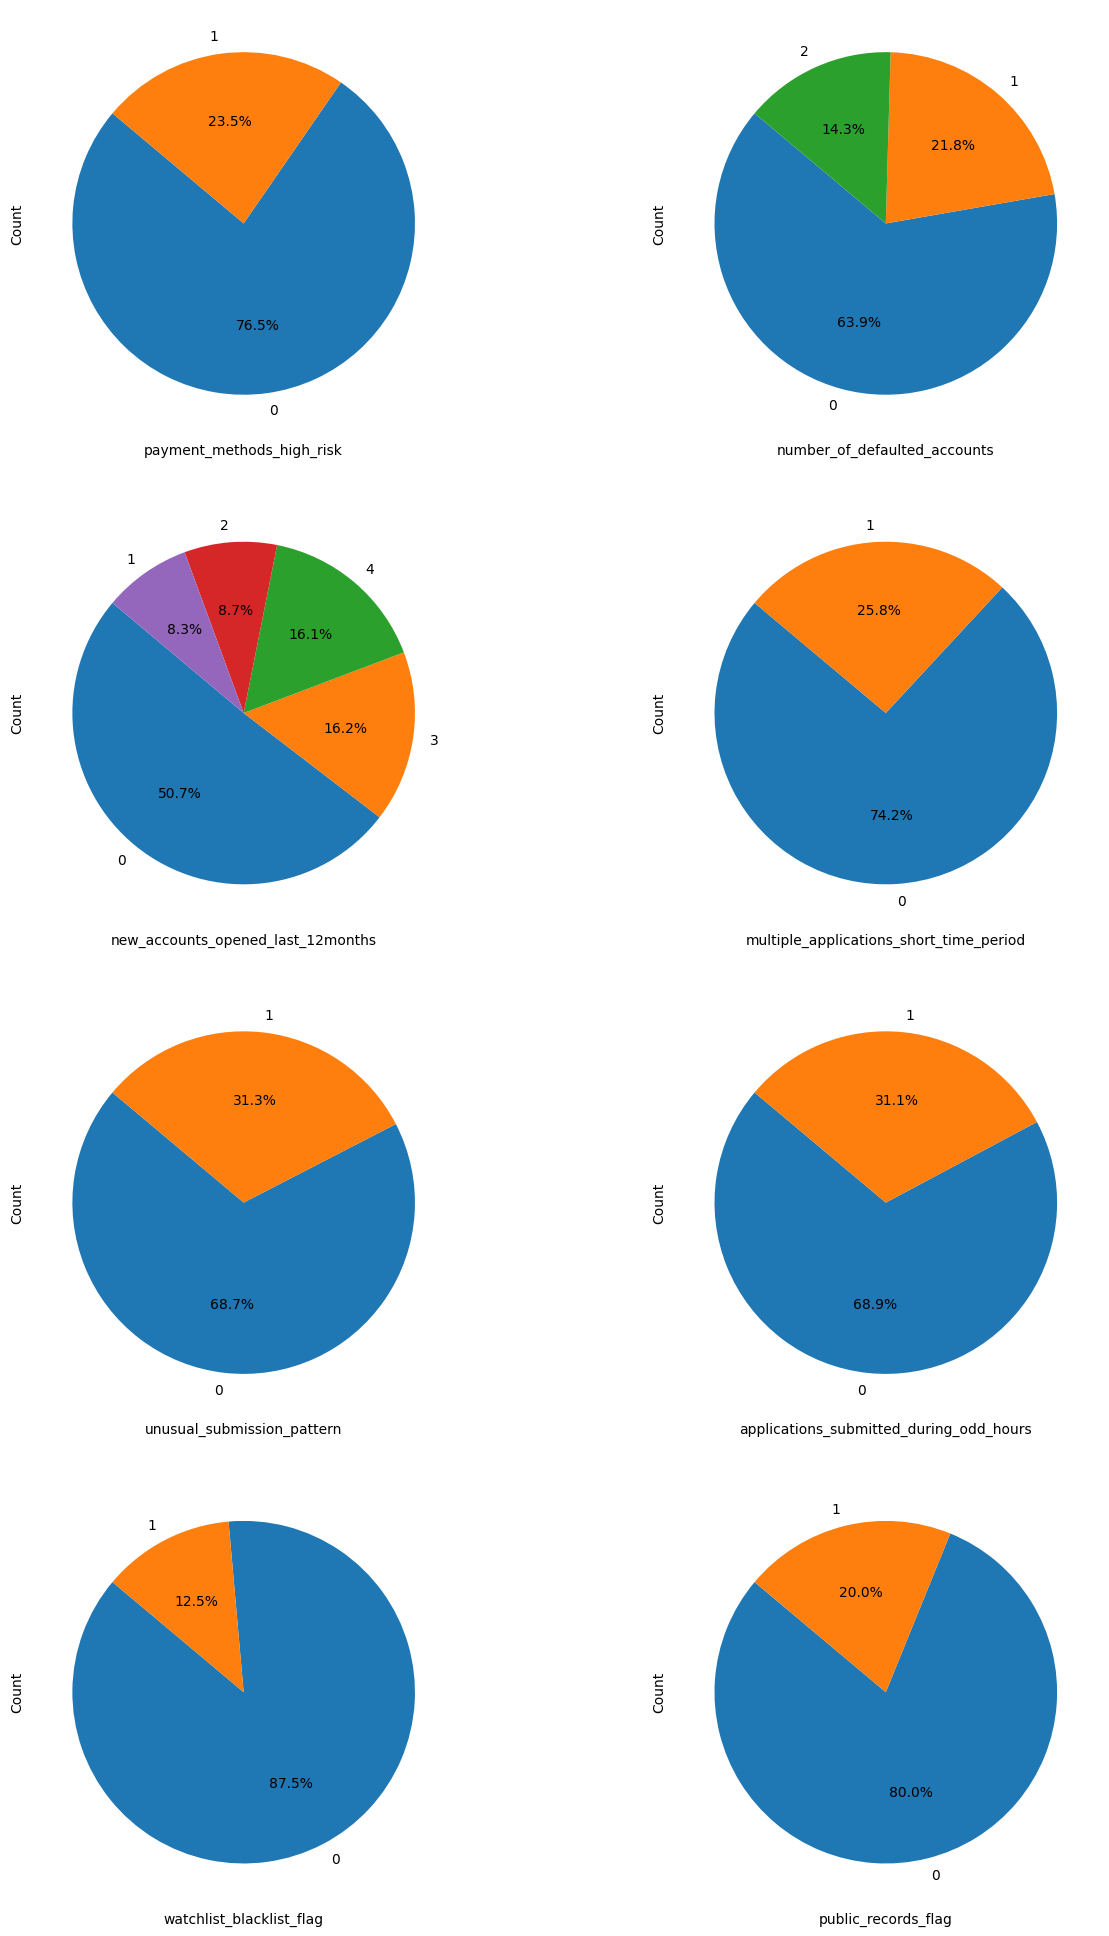

In [ ]:
col = ['payment_methods_high_risk','number_of_defaulted_accounts','new_accounts_opened_last_12months',
       'multiple_applications_short_time_period','unusual_submission_pattern',
       'applications_submitted_during_odd_hours','watchlist_blacklist_flag','public_records_flag']

print('Distribution of all features:\n')

num_rows = (len(col) + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

axs = axs.flatten()

for i, c in enumerate(col):
    # Access the column using the corrected name
    expert_diagnose_counts = data[c].value_counts()

    if not expert_diagnose_counts.empty:
        axs[i].pie(expert_diagnose_counts, labels=expert_diagnose_counts.index, autopct='%1.1f%%', startangle=140)
        axs[i].set_xlabel(c)
        axs[i].set_ylabel("Count")
    else:
        axs[i].axis('off')
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout(pad=3.0)
plt.show()

stack bar charts

The distribution of the target variable (charge_off_status) in each feature (as percentages):



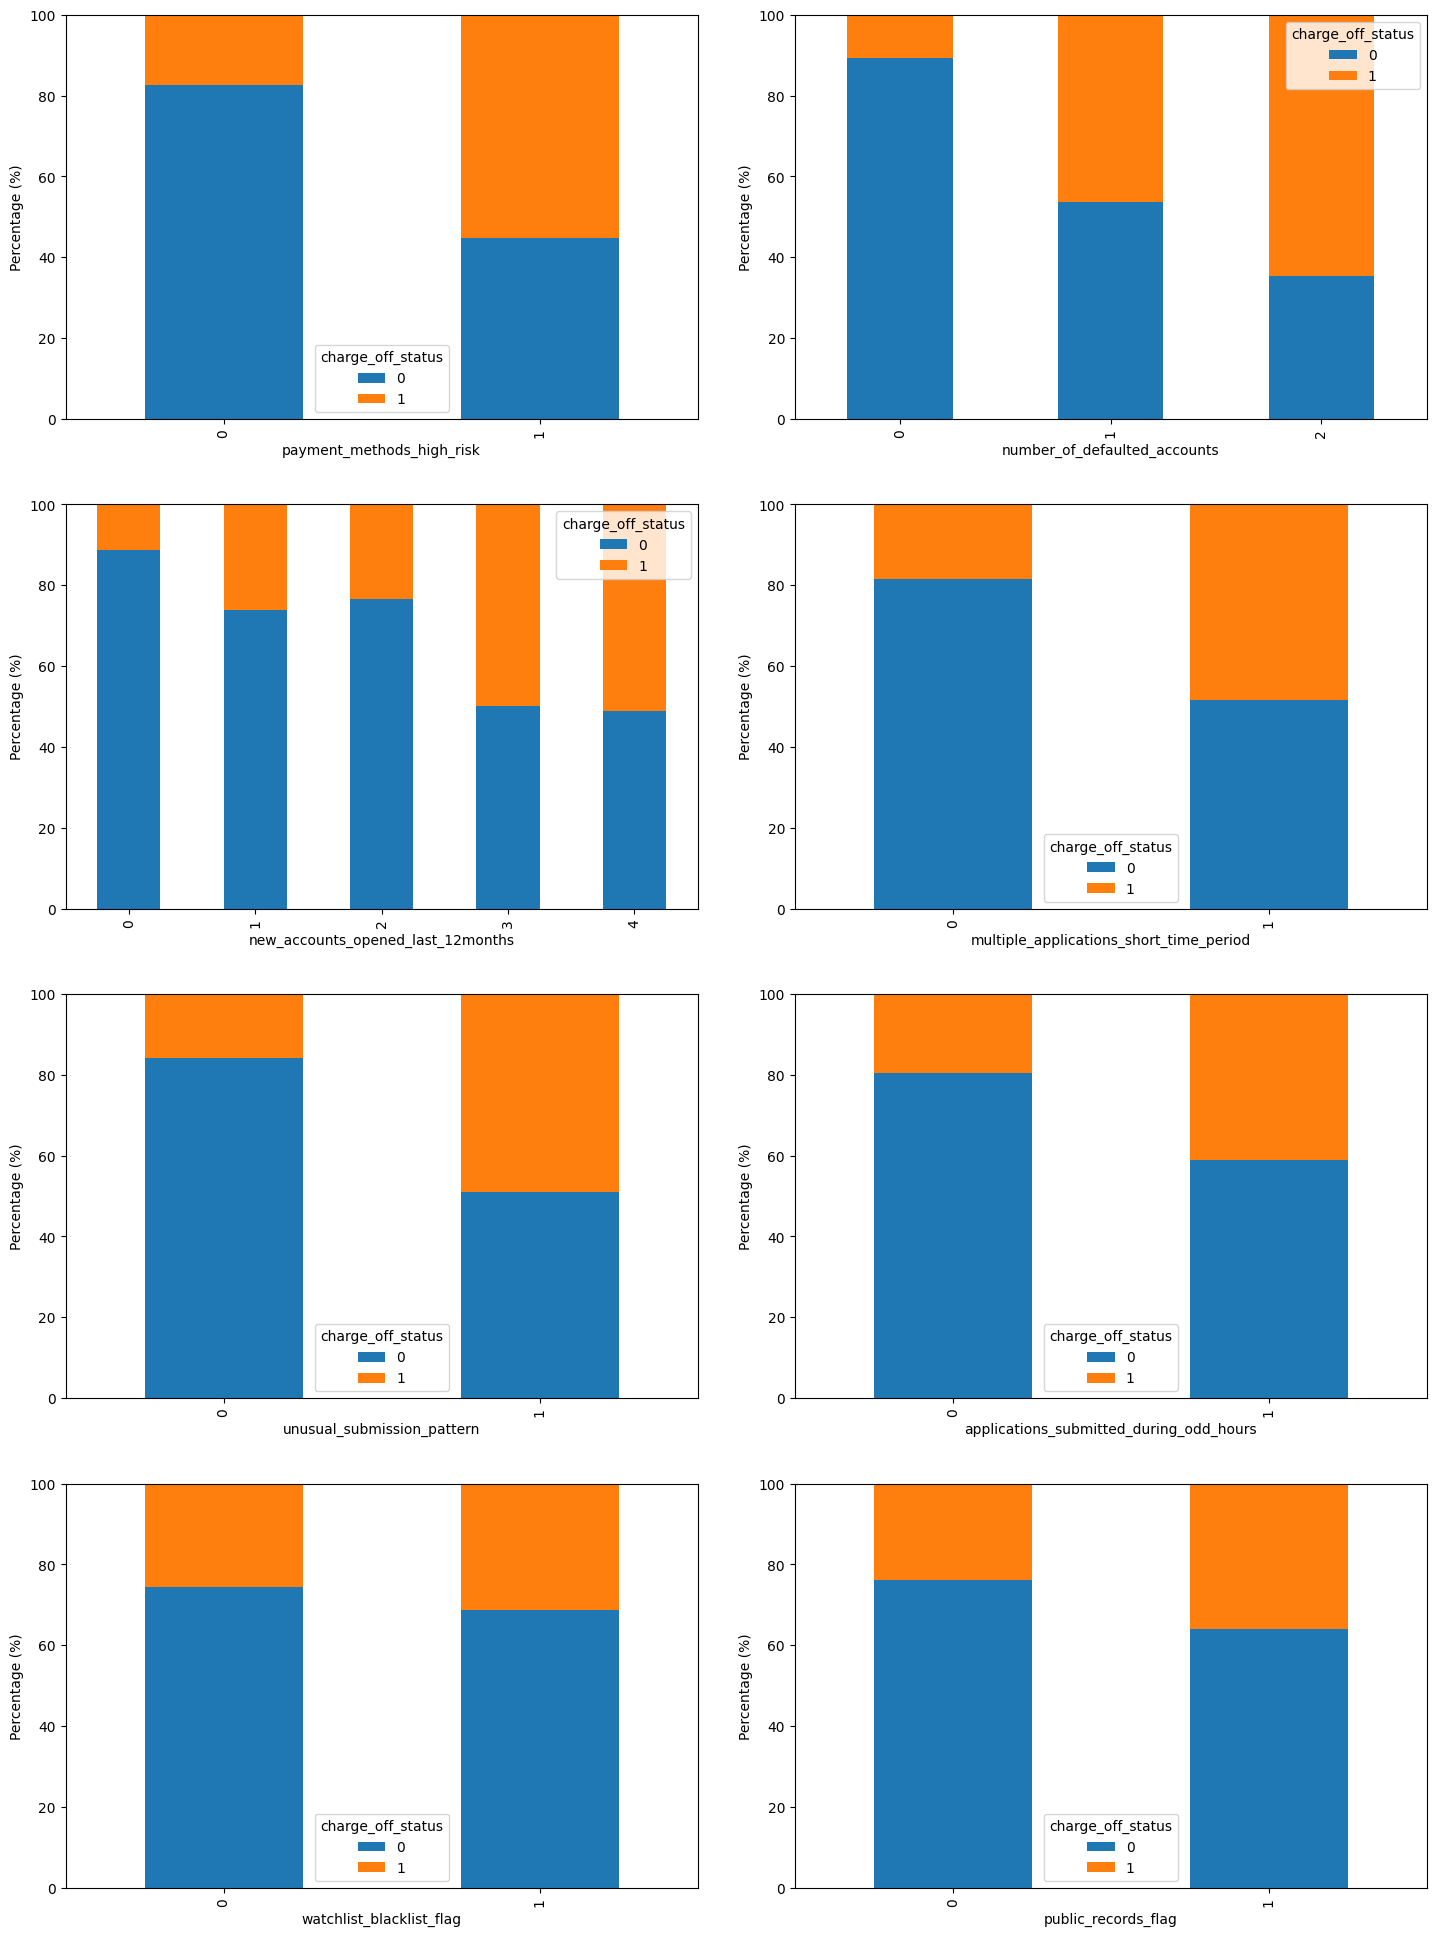

In [ ]:
print('The distribution of the target variable (charge_off_status) in each feature (as percentages):\n')

num_rows = (len(col) + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, c2 in enumerate(col):
    grouped_data = data.groupby([c2, 'charge_off_status']).size().unstack()

    if not grouped_data.empty:
        # Convert counts to percentages
        grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
        grouped_data.plot(kind='bar', stacked=True, ax=axs[i])

        axs[i].set_xlabel(c2)
        axs[i].set_ylabel("Percentage (%)")
        axs[i].set_ylim(0, 100)  # Set y-axis limit to 100% for easier interpretation
    else:
        axs[i].axis('off')

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


The distribution of the target variable (charge_off_status) in each feature (as percentages):



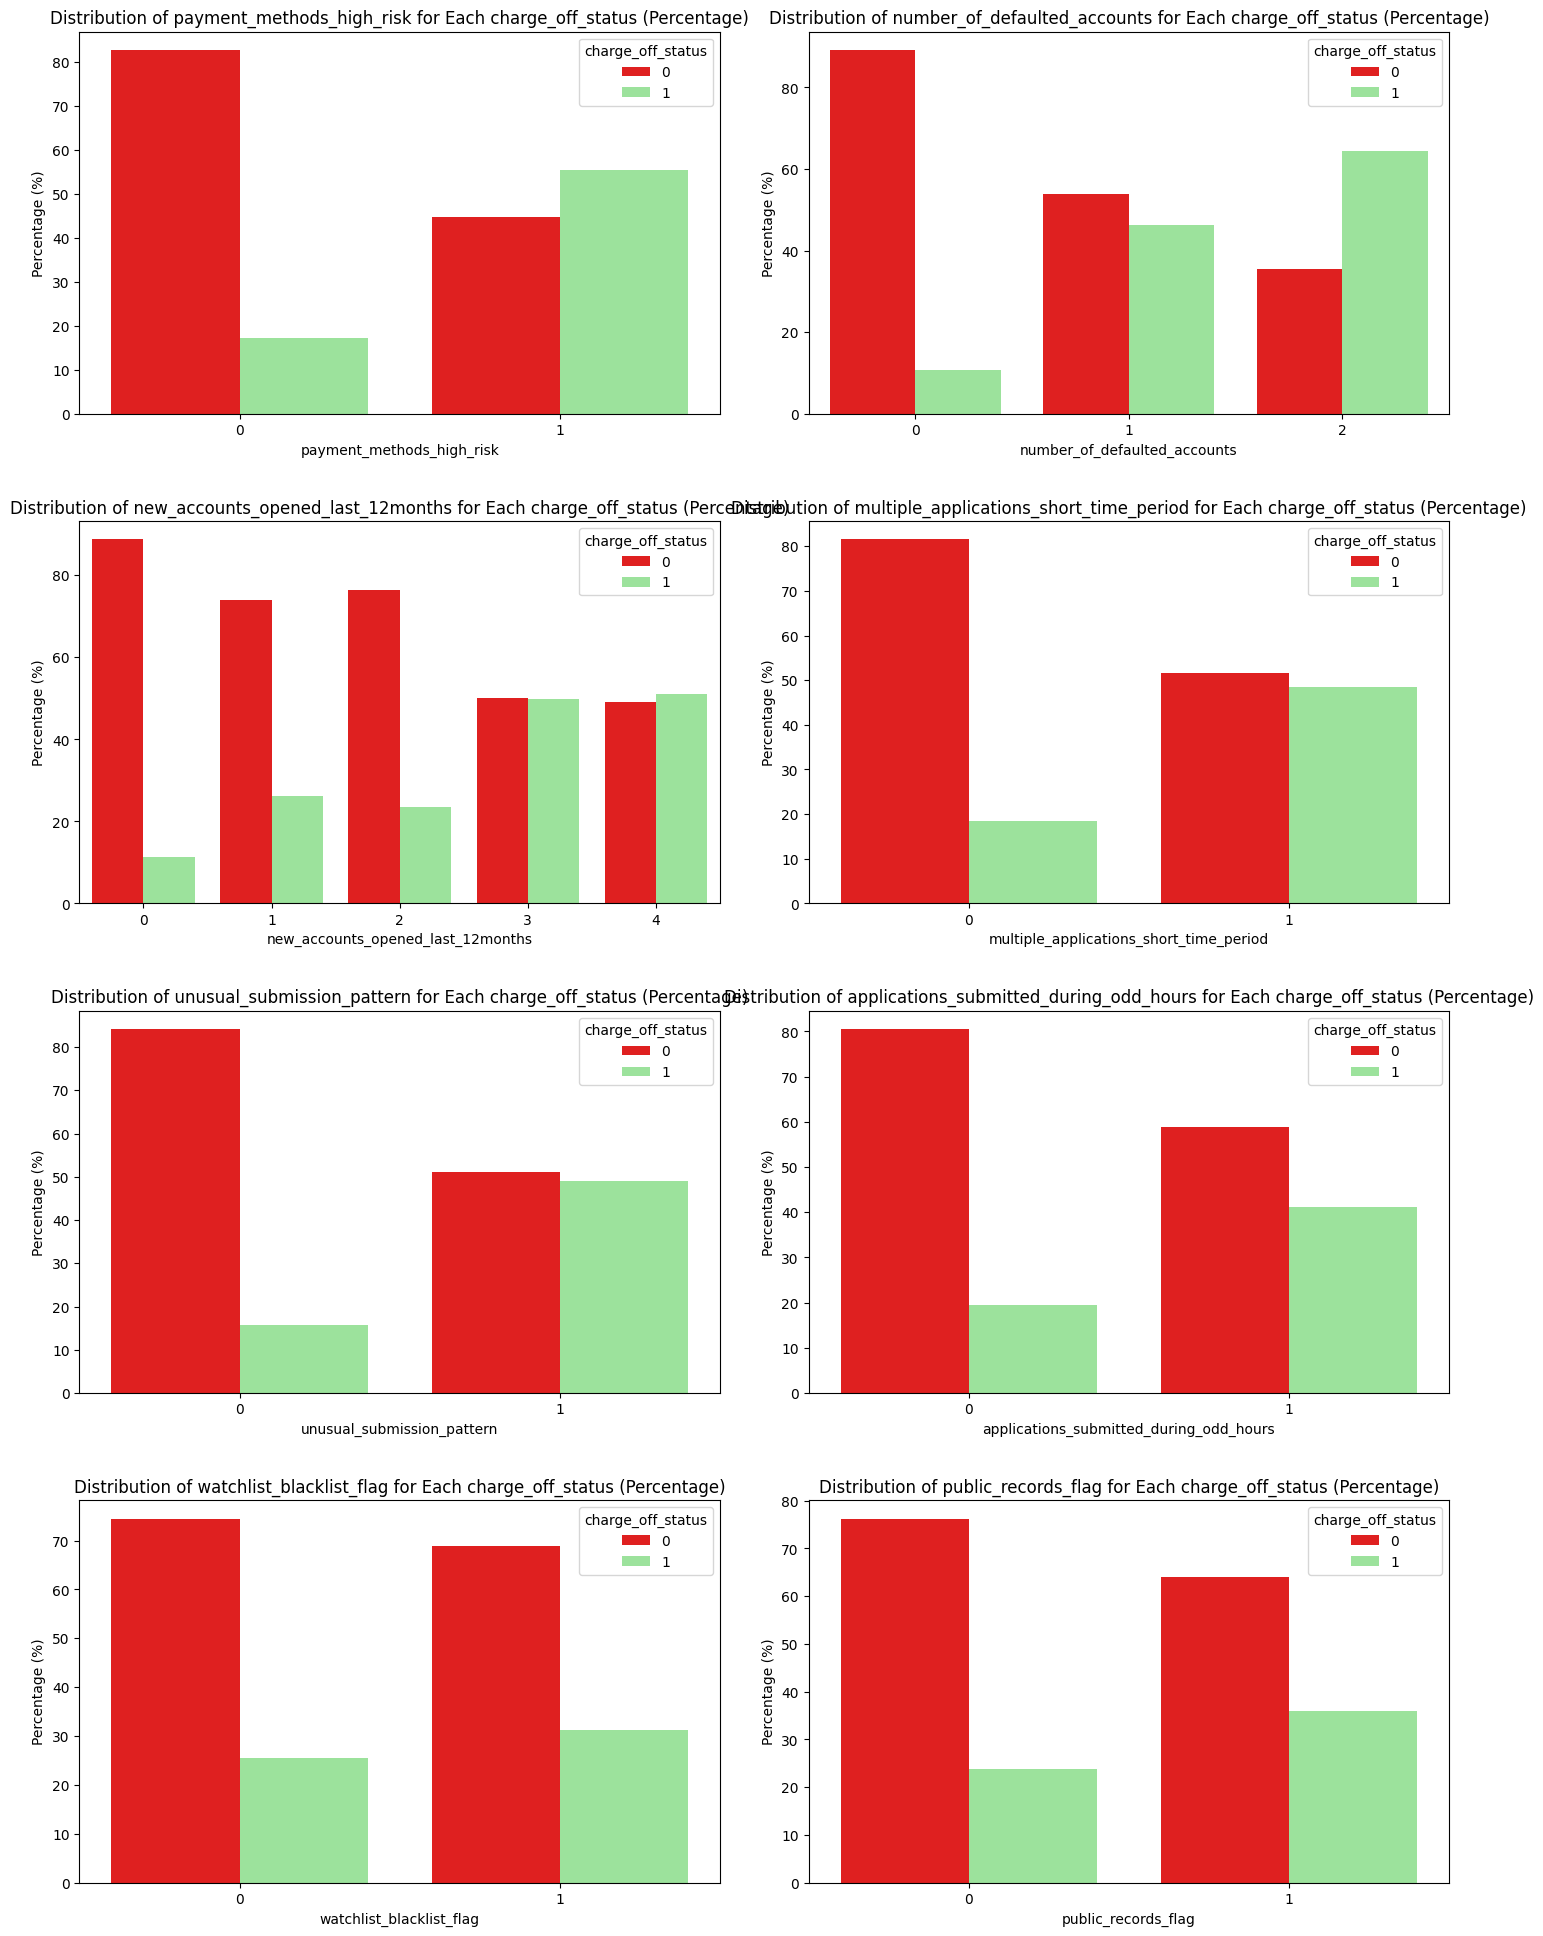

In [ ]:
print('The distribution of the target variable (charge_off_status) in each feature (as percentages):\n')

# Prepare the figure layout
num_rows = (len(col) + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Define the custom color palette
custom_palette = ['red', 'lightgreen']  # Blue for one category, Orange for the other

for i, c2 in enumerate(col):
    # Calculate percentages for each category of the feature within each charge_off_status level
    data_percent = data.groupby([c2, 'charge_off_status']).size().unstack()
    data_percent = data_percent.div(data_percent.sum(axis=1), axis=0) * 100

    if not data_percent.empty:
        # Reset index to use with seaborn
        data_percent = data_percent.stack().reset_index(name='Percentage')

        # Plot with seaborn
        sns.barplot(
            x=c2, y='Percentage', hue='charge_off_status',
            data=data_percent, ax=axs[i], palette=custom_palette
        )

        axs[i].set_title(f'Distribution of {c2} for Each charge_off_status (Percentage)')
        axs[i].set_xlabel(c2)
        axs[i].set_ylabel('Percentage (%)')
    else:
        axs[i].axis('off')

# Remove unused subplots (axes)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


boxplots

<ipython-input-11-b5d758c6e693>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-11-b5d758c6e693>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-11-b5d758c6e693>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-11-b5d758c6e693>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-11-b5d758c6e693>:28: FutureWarning: 

Passing `pa

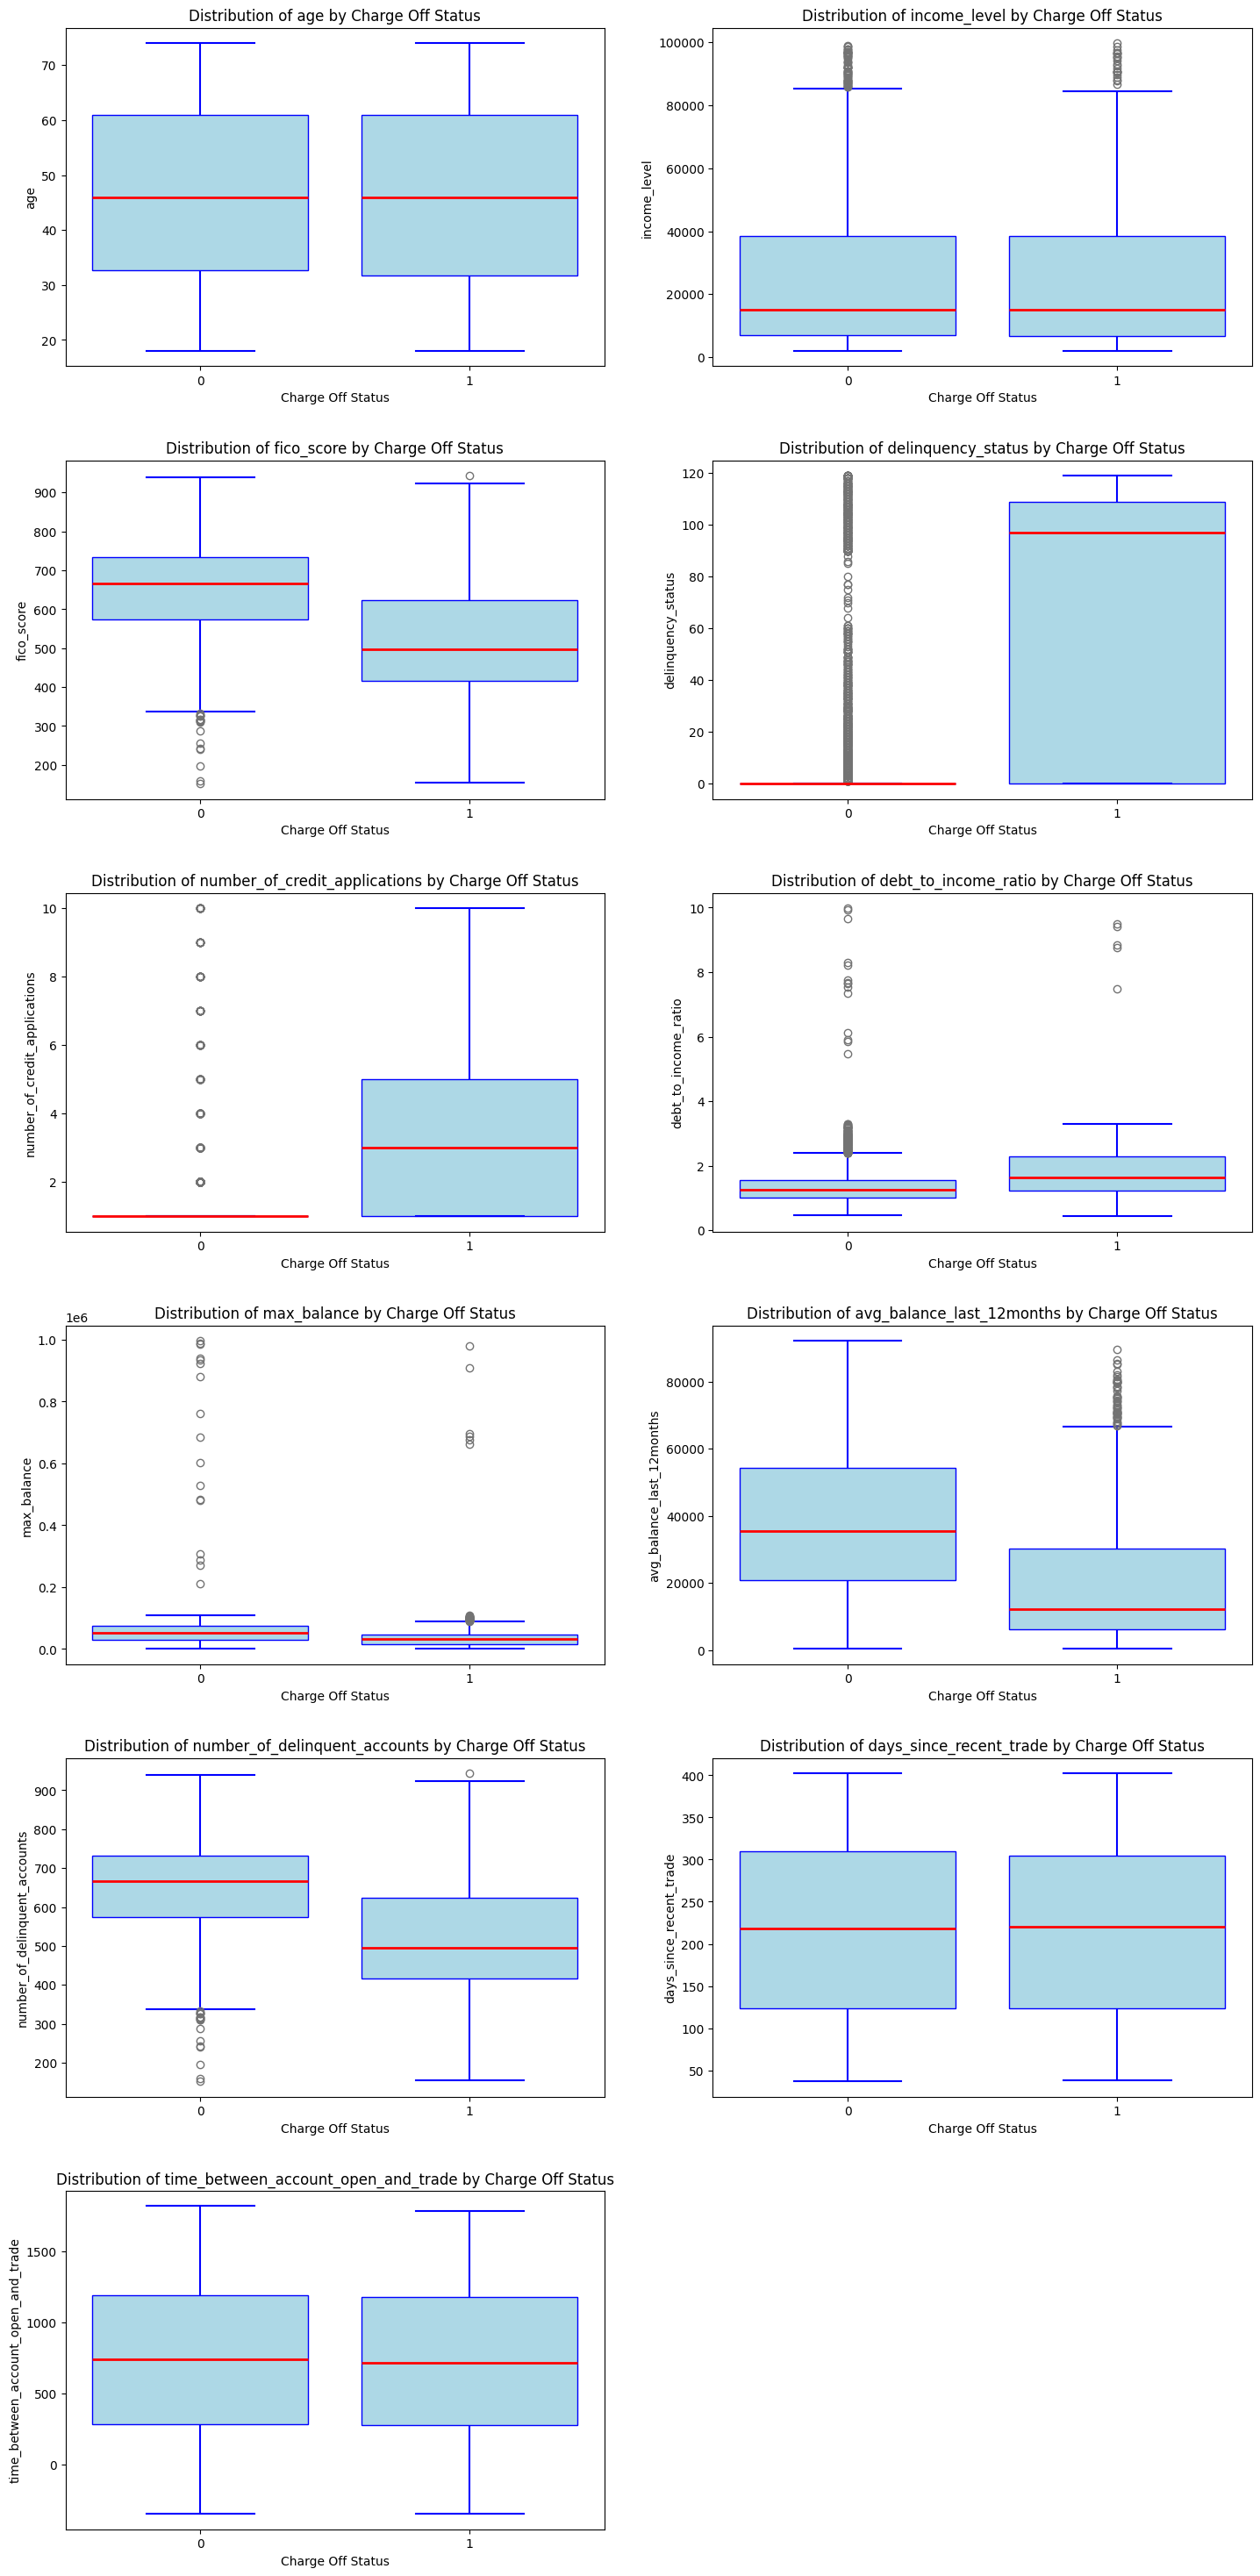

In [ ]:
# Define the numeric features to plot
numeric_features = [
    'age', 'income_level', 'fico_score', 'delinquency_status',
    'number_of_credit_applications', 'debt_to_income_ratio',
    'max_balance', 'avg_balance_last_12months',
    'number_of_delinquent_accounts', 'days_since_recent_trade',
    'time_between_account_open_and_trade'
]

# Number of rows for the grid layout
num_rows = (len(numeric_features) + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axs = axs.flatten()  # Flatten the axes array for easier indexing

# Define custom boxplot colors
boxprops = dict(facecolor='lightblue', edgecolor='blue')
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='blue', linewidth=1.5)
capprops = dict(color='blue', linewidth=1.5)

# Loop through each feature and create boxplots
for i, feature in enumerate(numeric_features):
    if feature in data.columns:  # Check if the feature exists in the DataFrame
        # Create a boxplot grouped by charge_off_status
        sns.boxplot(
            x='charge_off_status', y=feature, data=data, ax=axs[i], palette='pastel',
            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops
        )
        axs[i].set_title(f'Distribution of {feature} by Charge Off Status')
        axs[i].set_xlabel('Charge Off Status')
        axs[i].set_ylabel(feature)
    else:
        # Print a warning if the feature does not exist
        print(f"Warning: Feature '{feature}' not found in DataFrame. Skipping.")

# Turn off unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()


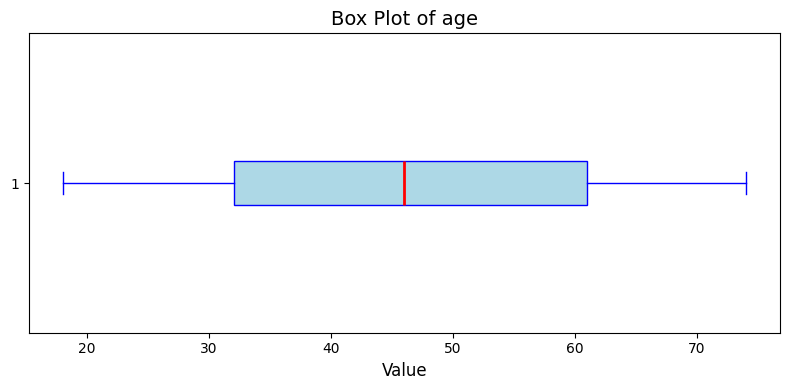

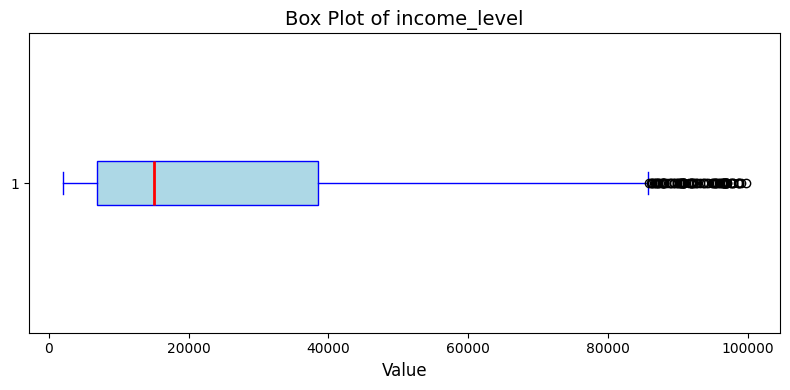

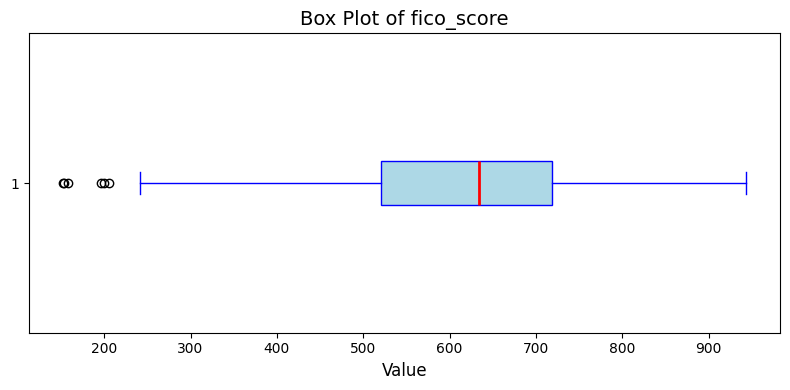

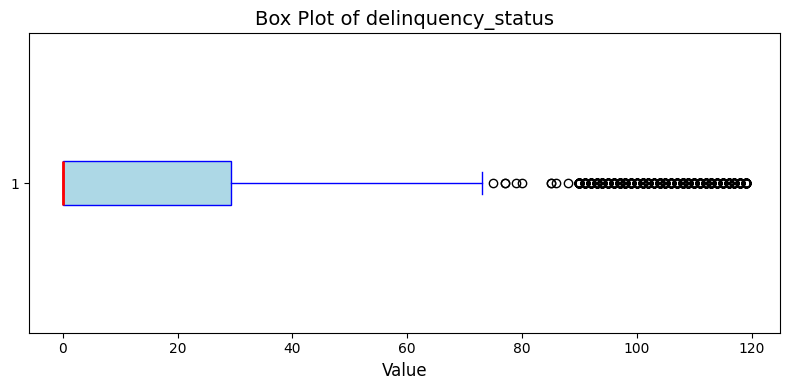

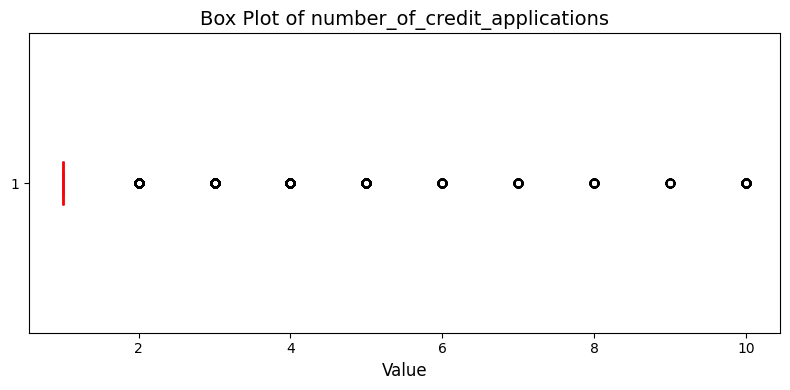

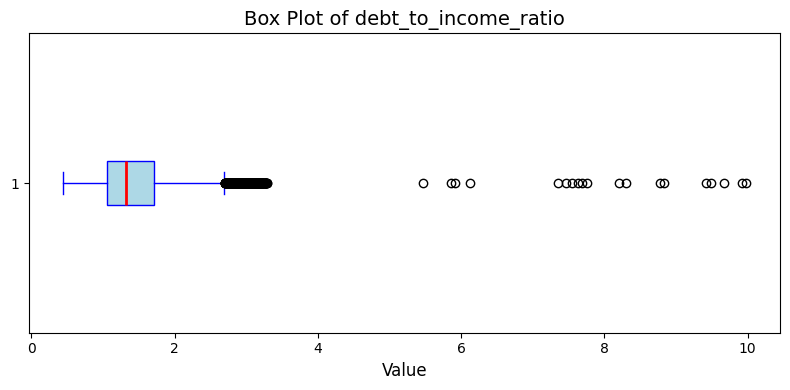

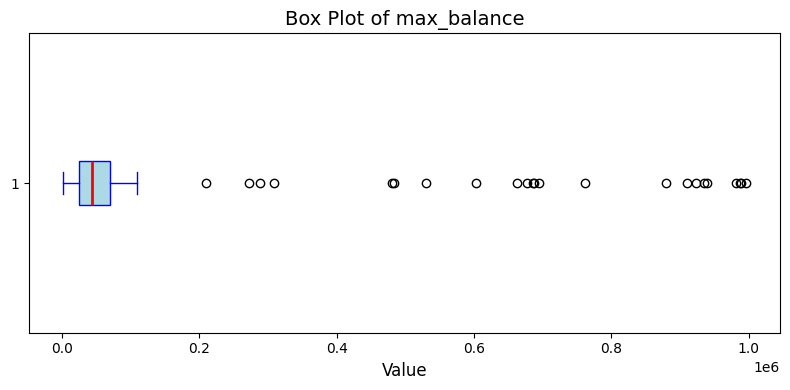

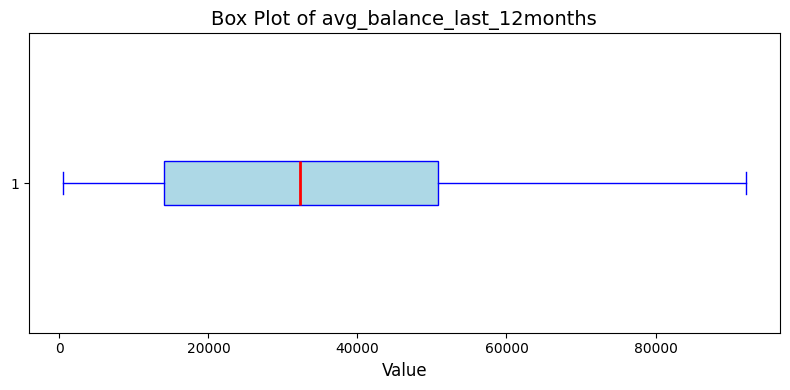

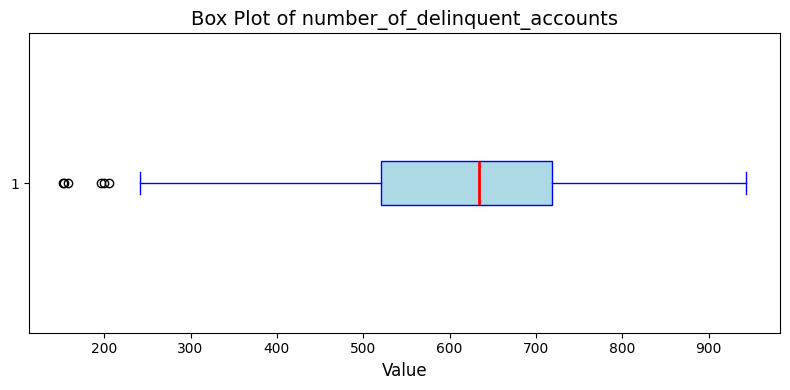

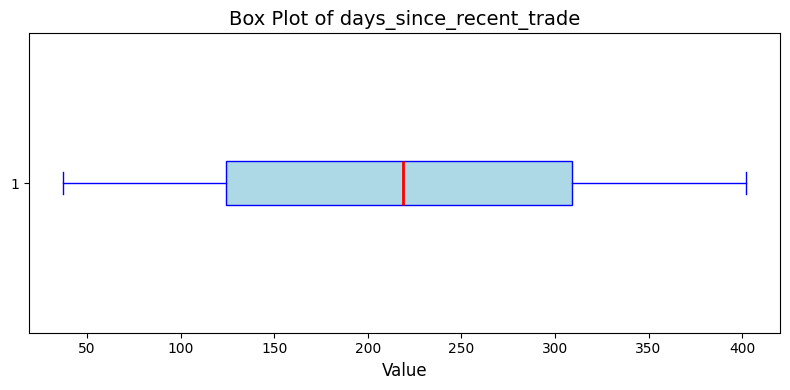

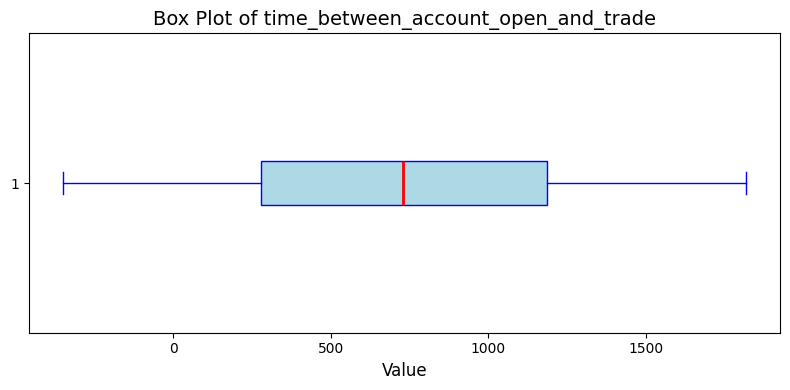

In [ ]:
# List of numeric variables for the box plot
variables_to_plot = ['age', 'income_level', 'fico_score', 'delinquency_status', 'number_of_credit_applications',
                     'debt_to_income_ratio', 'max_balance', 'avg_balance_last_12months',
                     'number_of_delinquent_accounts', 'days_since_recent_trade', 'time_between_account_open_and_trade']

# Create individual box plots
for var in variables_to_plot:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[var], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='red', linewidth=2))

    # Add labels and title
    plt.xlabel('Value', fontsize=12)
    plt.title(f'Box Plot of {var}', fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.show()

Histograms

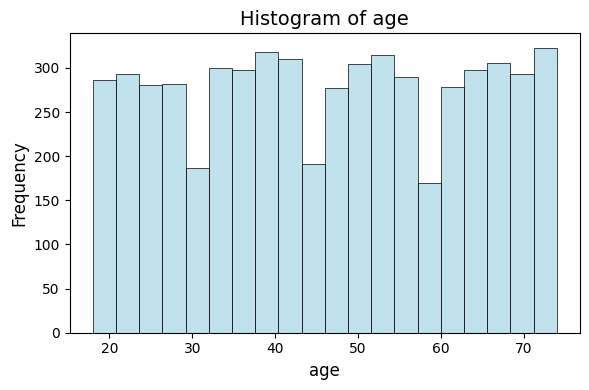

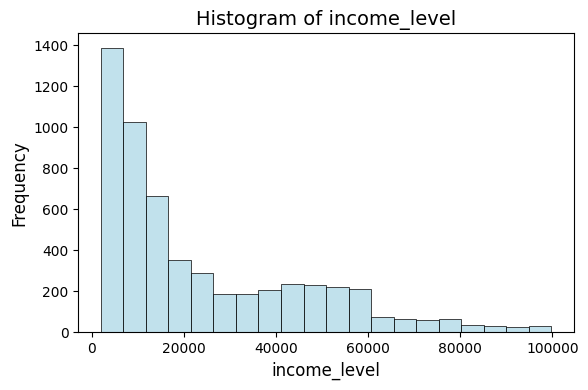

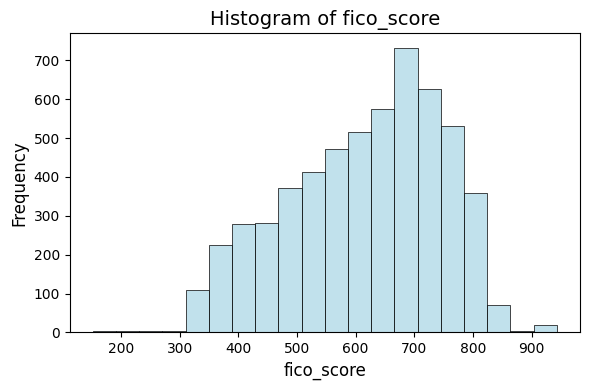

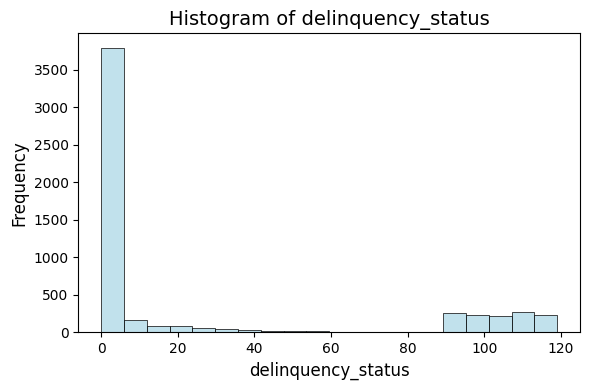

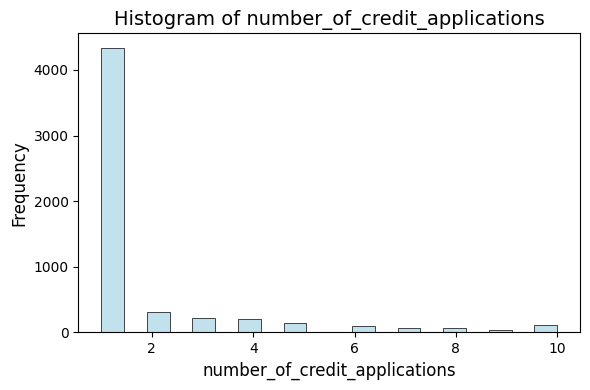

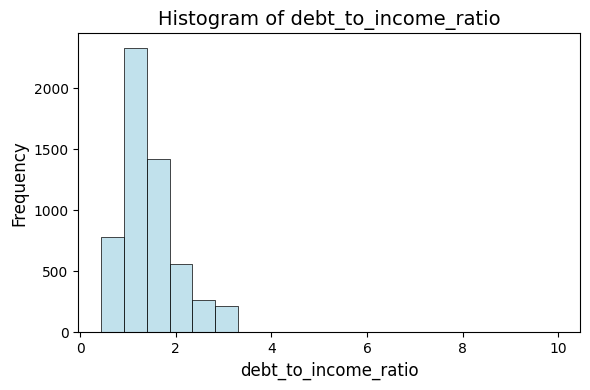

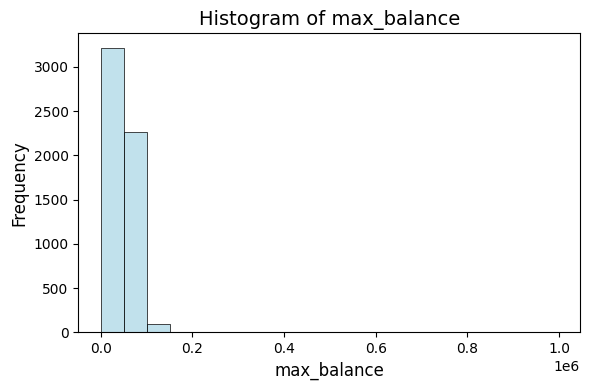

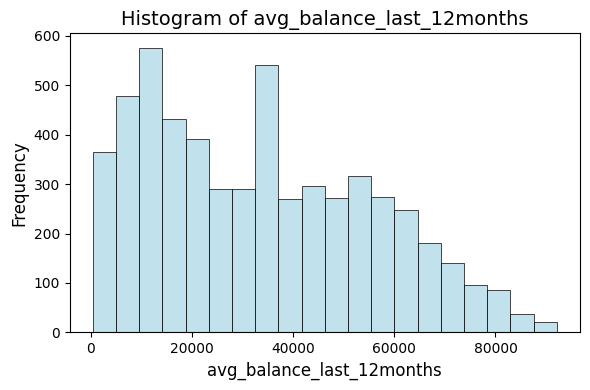

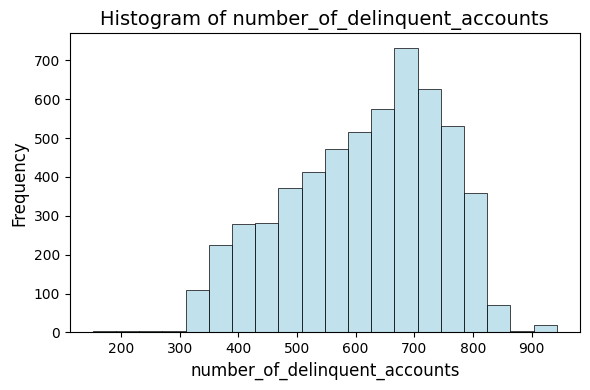

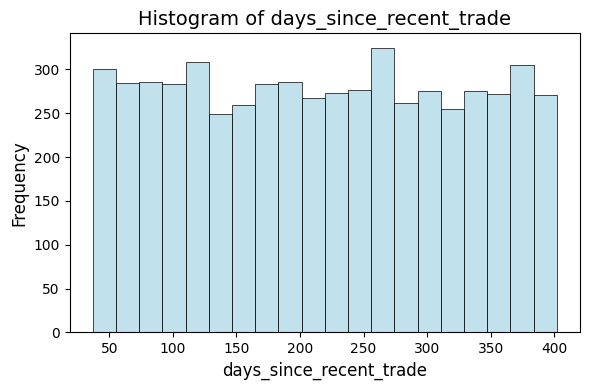

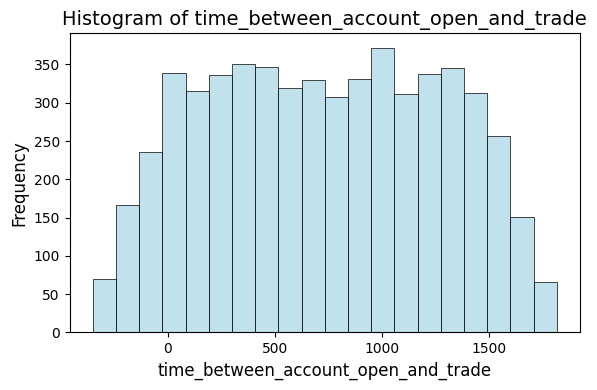

In [ ]:
# List of variables to plot histograms
variables_to_plot = ['age', 'income_level', 'fico_score', 'delinquency_status', 'number_of_credit_applications',
                     'debt_to_income_ratio', 'max_balance', 'avg_balance_last_12months',
                     'number_of_delinquent_accounts', 'days_since_recent_trade', 'time_between_account_open_and_trade']

# Create individual histograms
for var in variables_to_plot:
    plt.figure(figsize=(6, 4))

    # Plot the histogram using seaborn
    sns.histplot(data[var], bins=20, kde=False, color='lightblue', linewidth=0.5)

    # Set plot labels and title
    plt.title(f'Histogram of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()


Density curve

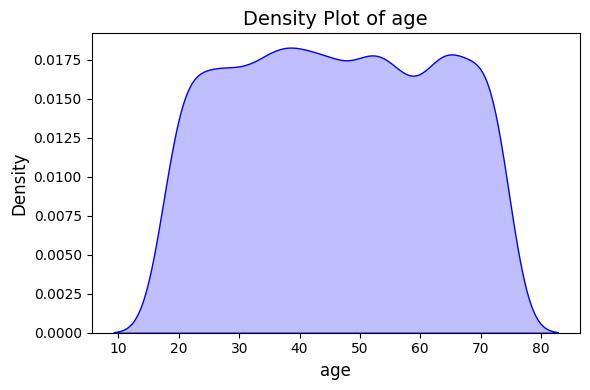

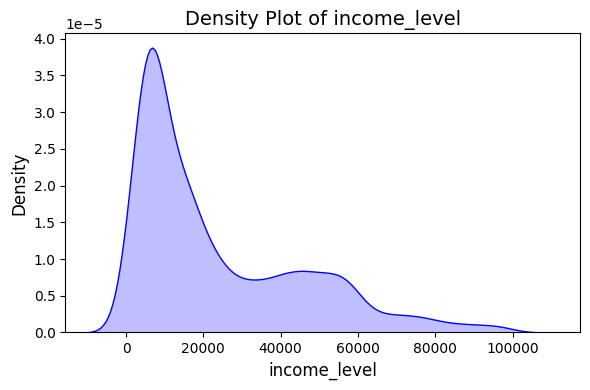

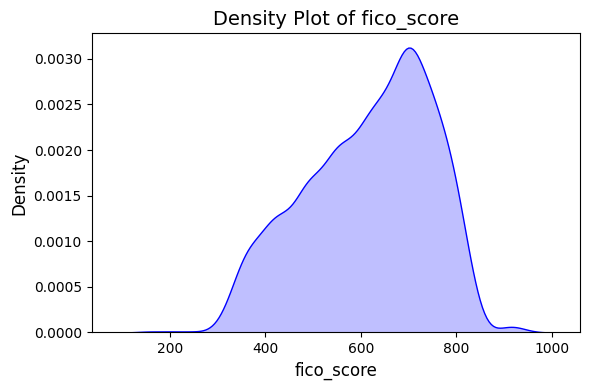

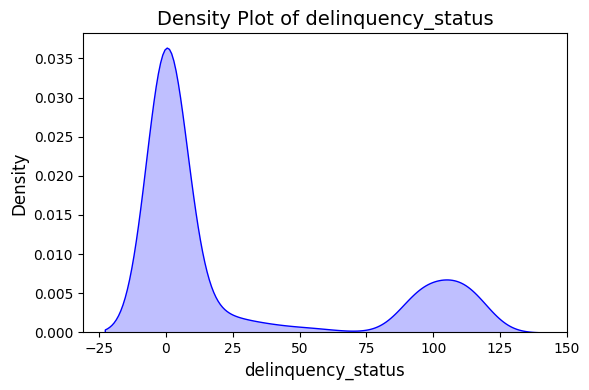

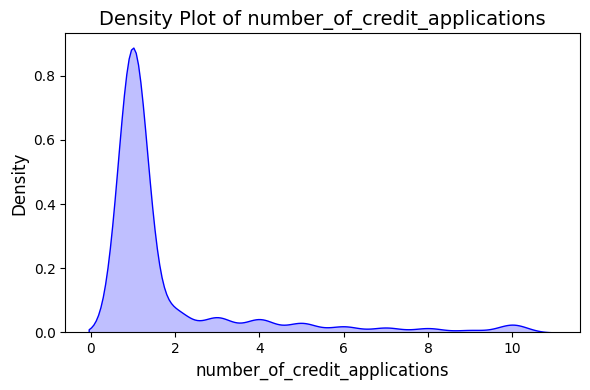

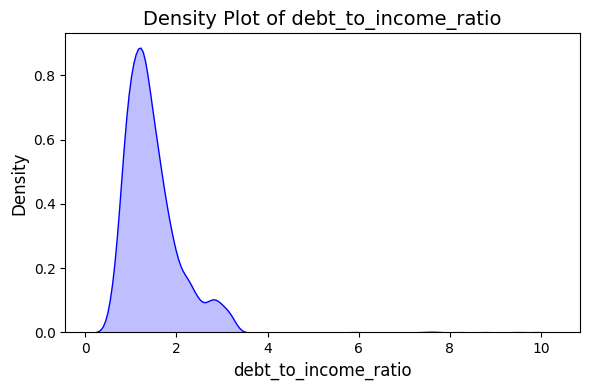

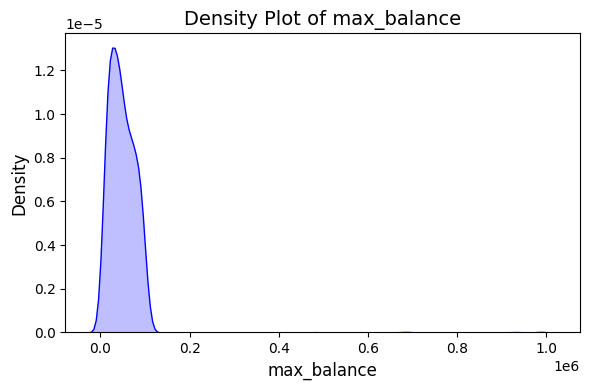

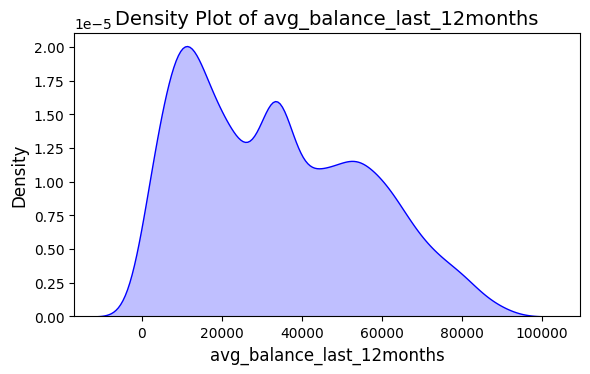

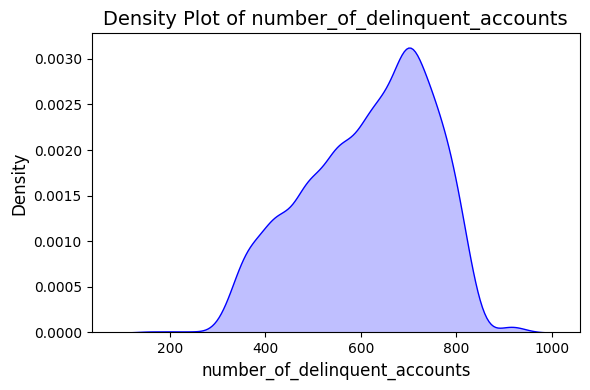

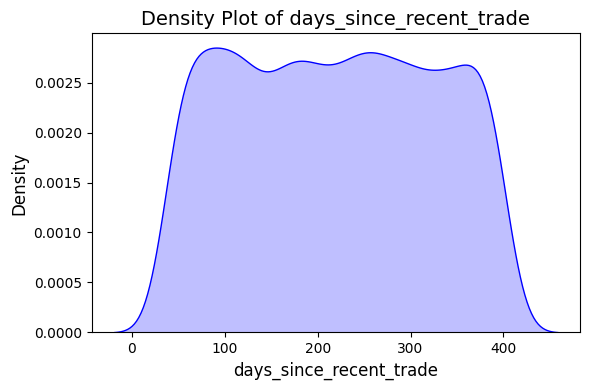

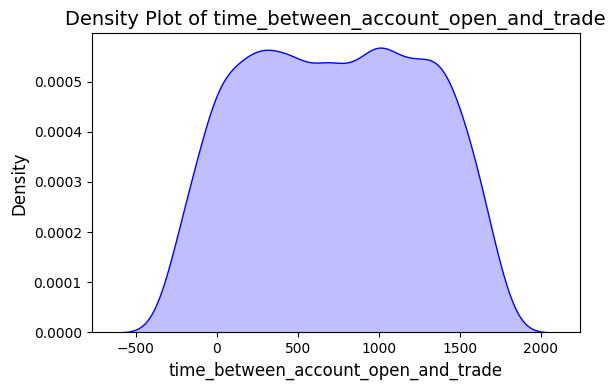

In [ ]:
# List of variables to plot density curves
variables_to_plot = numeric_features = ['age', 'income_level', 'fico_score','delinquency_status','number_of_credit_applications',
                   'debt_to_income_ratio','max_balance','avg_balance_last_12months',
                    'number_of_delinquent_accounts','days_since_recent_trade','time_between_account_open_and_trade']

# Create individual density plots
for var in variables_to_plot:
    plt.figure(figsize=(6, 4))

    # Plot the density curve using seaborn
    sns.kdeplot(data[var], fill=True, color='blue', linewidth=1)

    # Set plot labels and title
    plt.title(f'Density Plot of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()


times plot

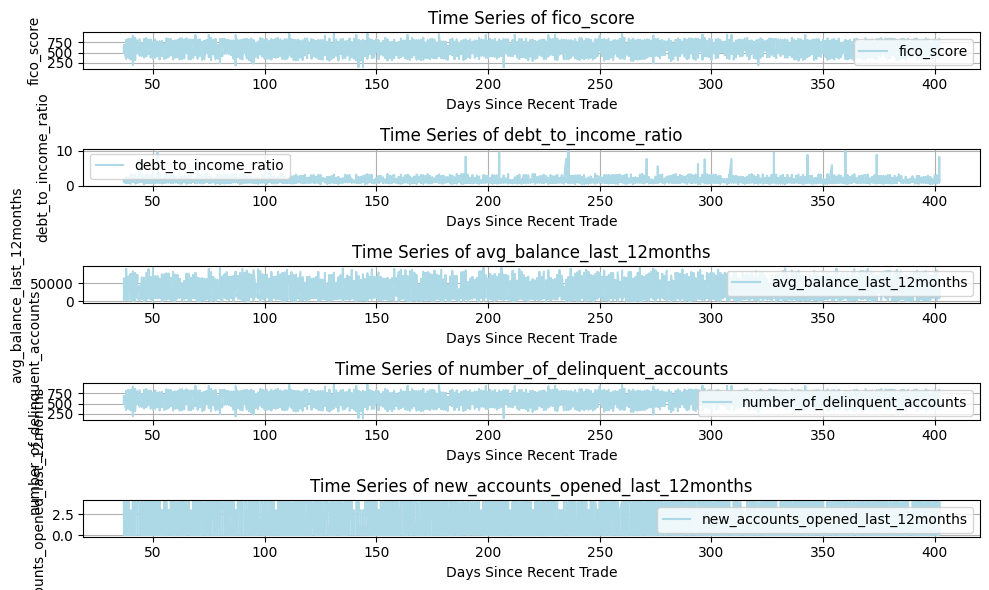

In [ ]:
# Reset the index before setting a new one
data = data.reset_index()  # This line is added to reset the index

# Set `days_since_recent_trade` as the time index
data = data.sort_values(by='days_since_recent_trade')
data.set_index('days_since_recent_trade', inplace=True)

# Select suitable numeric variables for time series visualization
variables_to_plot = [
    'fico_score',
    'debt_to_income_ratio',
    'avg_balance_last_12months',
    'number_of_delinquent_accounts',
    'new_accounts_opened_last_12months'
]

# Create subplots for time series
plt.figure(figsize=(10, 6))
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    plt.plot(data.index, data[variable], label=variable, color='lightblue')
    plt.title(f'Time Series of {variable}')
    plt.xlabel('Days Since Recent Trade')
    plt.ylabel(variable)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

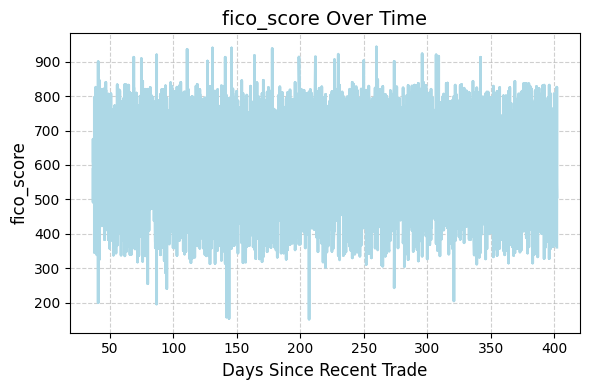

In [ ]:
# Reset the index before setting a new one
data = data.reset_index()  # This line is added to reset the index

# Set `days_since_recent_trade` as the time index
data = data.sort_values(by='days_since_recent_trade')
data.set_index('days_since_recent_trade', inplace=True)

# Select a variable to plot
variable_to_plot = 'fico_score'  # Change this to any variable you want to plot

# Create the line plot
plt.figure(figsize=(6, 4))
plt.plot(data.index, data[variable_to_plot], color='lightblue', linewidth=2)

# Add labels and title
plt.title(f'{variable_to_plot} Over Time', fontsize=14)
plt.xlabel('Days Since Recent Trade', fontsize=12)
plt.ylabel(variable_to_plot, fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()